## Laboratorio I - Femicidios - Grupo 12: Clerici, Pérez

# Laboratorio I



In [1]:
# %matplotlib notebook
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
sns.set_context('talk')

## Estadísticas oficiales de femicidio

**por qué elegimos el dataset de femicidios?**

In [2]:
# Cargar dataset
dataset = pd.read_csv('http://datos.jus.gob.ar/dataset/27bb9b2c-521b-406c-bdf9-98110ef73f34/resource/a2e1c899-cbaa-4bf6-b623-6648f150cab0/download/registro-de-femicidios-2018-04-13.csv', 
                      encoding='utf8')
# quitar tilde de nombre de columna número
dataset.loc[:,'numero'] = dataset[u'número']
#elimino la columna que queda con 'número' con tilde
dataset = dataset.drop('número', axis=1)
dataset.head(5)

,edad,identidad_genero,tipo_victima,lugar_hecho,modalidad_comisiva,fecha_hecho,numero
0,8,MUJER,VINCULADO,Buenos Aires,QUEMADURAS -,2018-04-06,1108
1,11,MUJER,VINCULADO,Buenos Aires,QUEMADURAS -,2018-04-06,1108
2,31,MUJER,PRINCIPAL,Buenos Aires,QUEMADURAS -,2018-04-06,1108
3,22,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO -,2018-04-15,1107
4,18,MUJER,PRINCIPAL,Chaco,ASFIXIA - DEGOLLAMIENTO -,2018-04-15,1107


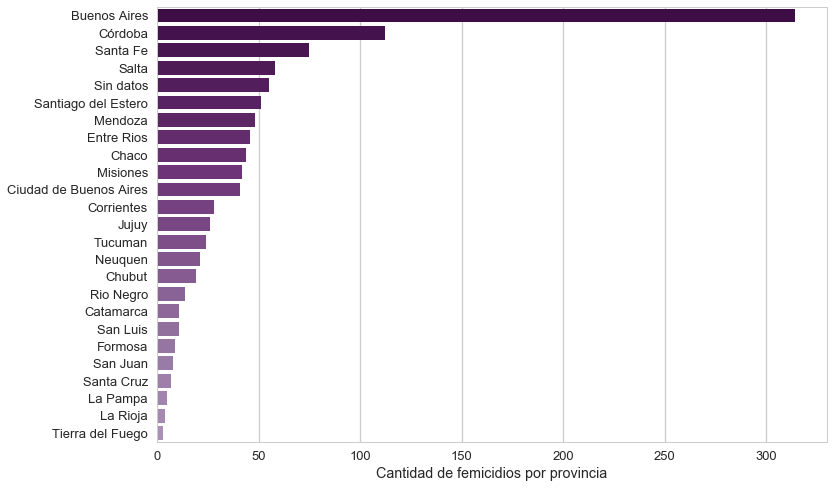

In [3]:
fig = plt.figure(figsize=(12,8))
# graficar violencia por provincia
ax = sns.countplot(data=dataset, y='lugar_hecho', 
                   palette=sns.color_palette("PRGn", 100), 
                   order=dataset['lugar_hecho'].value_counts().index
                  )
ax.set_ylabel('')
ax.set_xlabel('Cantidad de femicidios por provincia')
plt.show()

El gráfico anterior no es representativo de las muertes por violencia de género de cada provincia, o no es 'justo', ya que una provincia como Buenos Aires puede ser mostrada como la más violenta hacia las mujeres si no se considera su población. Una forma de mostrar esto correctamente es pesar la cantidad de femicidios por cantidad de habitantes, lo que dará una idea de *densidad* de femicidios por provincia.

Buscamos los datos del Censo 2010 porque nos interesa pesar la cantidad de femicidios por cantidad de habitantes.
Los datos son obtenidos de https://www.sig.indec.gov.ar/censo2010/ y se encuentran en el archivo `numero-habitantes-provincia-censo2010.txt`.

In [4]:
censo2010 = pd.read_csv('numero-habitantes-provincia-censo2010.csv')
censo2010 = censo2010[['provincia', 'numero_habitantes']]
censo2010.head(4)

,provincia,numero_habitantes
0,Ciudad de Buenos Aires,2890151
1,Tucuman,1448188
2,Buenos Aires,15625084
3,Misiones,1101593


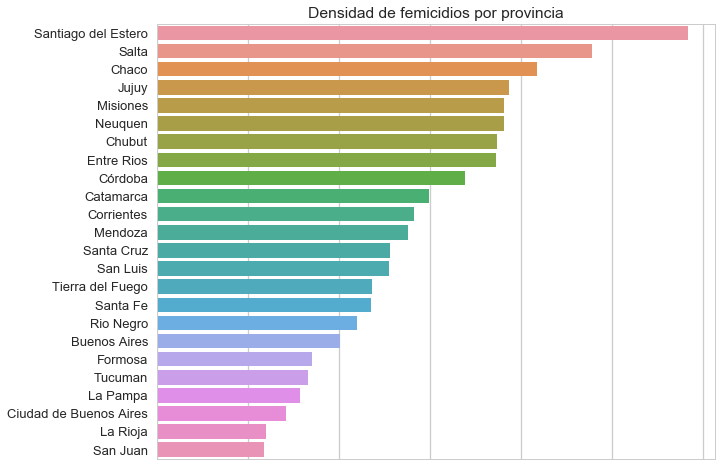

In [5]:
# femicidios por provincia
ds = dataset['lugar_hecho'].value_counts()
# habitantes por provincia
cs = pd.Series(censo2010['numero_habitantes'].get_values(), index=censo2010['provincia'])
fem_x_hab = ds.div(cs)
# sacamos los datos donde no se especifica pronvincia del hecho
fem_x_hab = fem_x_hab.dropna().sort_values(ascending=False)
fig2 = plt.figure(figsize=(10,8))
ax1 = sns.barplot(x=fem_x_hab.get_values(), y=fem_x_hab.index)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title('Densidad de femicidios por provincia')
plt.show()

**ACÁ MEJOR MOSTRARLO CON UN MAPA DE LA ARGENTINA USANDO Choropleth Map**

# Datos a buscar para realizar comparaciones

* PBI por provincia
* Porcentaje de personas en situación de pobreza e indigencia
* Inversión en seguridad
* Inversión en educación
* Inversión en políticas de género e inclusión

***Ahora veremos la distribución de edad de las victimas mujeres***

In [6]:
#sacamos la edad de solo las mujeres
edad_mujer = dataset.where((dataset['identidad_genero']=='MUJER') & (dataset['edad']!="Sin datos"))
edad_mujer = edad_mujer.dropna()['edad'].apply(float)

#hay un dato mal cargado que dice que hay una mujer de 999 años
edad_mujer = edad_mujer.where(edad_mujer < 200.0)
edad_mujer.describe()

count    918.000000
mean      32.345316
std       14.768351
min        0.000000
25%       21.000000
50%       30.000000
75%       42.000000
max       90.000000
Name: edad, dtype: float64

La media es: 32.34531590413943
La mediana: 30.0
Y la moda: 0    22.0
dtype: float64



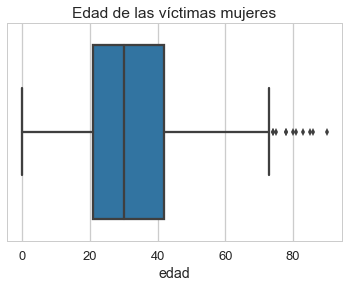

In [7]:
print("La media es: {}\nLa mediana: {}\nY la moda: {}\n".format(str(edad_mujer.mean()),str(edad_mujer.median())
                                                                    , str(edad_mujer.mode())))
a = sns.boxplot(edad_mujer)
a.set_title("Edad de las víctimas mujeres")
plt.show()

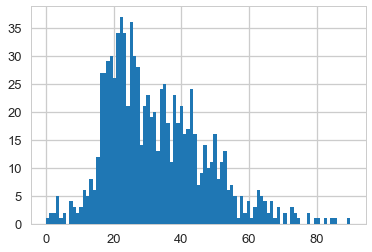

In [8]:
ax3=edad_mujer.hist(bins=91)



In [9]:
cant_mujeres = edad_mujer.count()
def pmf(x,serie):
    sum = 0
    for i in serie:
        if i == x:
            sum =  sum + 1
    sum = sum/(serie.dropna().size)
    return sum

def cmf(x,serie):
    sum = 0
    for i in serie.drop_duplicates():
        if i<=x:
            sum = sum + pmf(i,serie)
    return sum

cmf(100,edad_mujer)


0.9999999999999999

**Ahora la distribución de las víctimas hombres(vinculadas)**

In [10]:
#sacamos la edad de solo los hombres
edad_hombre = dataset.where((dataset['identidad_genero'] == 'HOMBRE')&(dataset['edad']!="Sin datos"))
edad_hombre = edad_hombre.dropna()['edad'].apply(float)
edad_hombre.describe()

count    35.000000
mean     21.571429
std      19.315166
min       0.000000
25%       5.000000
50%      20.000000
75%      32.000000
max      70.000000
Name: edad, dtype: float64

La media es: 21.571428571428573
La mediana: 20.0
Y la moda: 0    3.0
1    4.0
2    7.0
dtype: float64



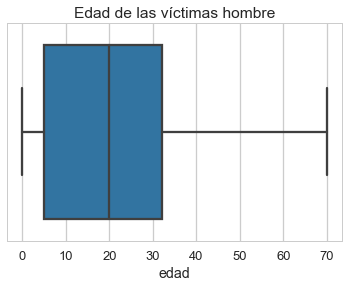

In [11]:
print("La media es: {}\nLa mediana: {}\nY la moda: {}\n".format(str(edad_hombre.mean()),str(edad_hombre.median())
                                                                    , str(edad_hombre.mode())))
hombre_box = sns.boxplot(edad_hombre)
hombre_box.set_title("Edad de las víctimas hombre")
plt.show()

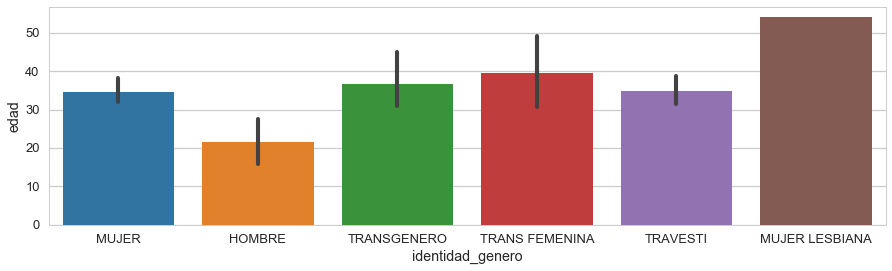

In [12]:
fig = plt.figure(figsize=(15,4))
edad_muertxs = dataset.where((dataset['identidad_genero'] != 'Sin datos')&(dataset['edad'] != 'Sin datos'))
sns.barplot(x = 'identidad_genero', y = edad_muertxs.edad.dropna().apply(float), data = edad_muertxs)

Text(0.5,1,'Escala logarítmica')

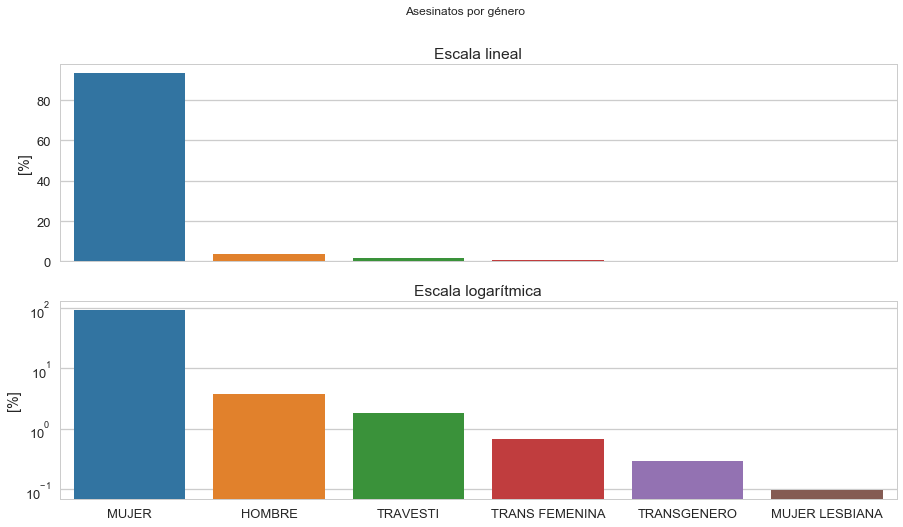

In [13]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8) ,sharex=True)

sns.barplot(x= dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts().index,
            y=100*dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts(normalize=True), 
            data=dataset,
            ax = ax1)
sns.barplot(x= dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts().index,
            y=100*dataset['identidad_genero'].where(dataset['identidad_genero'] != 'Sin datos').value_counts(normalize=True), 
            data=dataset,
            ax = ax2)

ax2.set_yscale('log')
ax1.set_ylabel('[%]')
ax2.set_ylabel('[%]')
fig.suptitle('Asesinatos por género')
ax1.set_title('Escala lineal')
ax2.set_title('Escala logarítmica')

**Explicar porqué conviene mostrar en escala logarítmica**

In [14]:
def yeartoint(fecha):
    if (fecha != 'Sin datos'):
        return int(fecha.split('-')[0])
    else:
        return np.nan

def monthtoint(fecha):
    if (fecha != 'Sin datos'):
        return int(fecha.split('-')[1])
    else:
        return np.nan

In [15]:
fecha_anio = dataset['fecha_hecho'].apply(yeartoint)
fecha_mes = dataset['fecha_hecho'].apply(monthtoint)
fecha_anio_principal = dataset.where((dataset['tipo_victima'] == 'PRINCIPAL')).dropna()['fecha_hecho'].apply(yeartoint)
fecha_mes_principal = dataset.where(dataset['tipo_victima'] == 'PRINCIPAL').dropna()['fecha_hecho'].apply(monthtoint)

(0, 250)

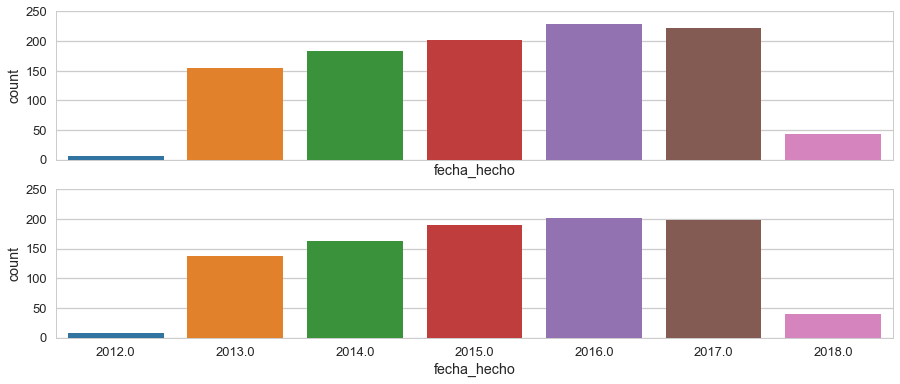

In [16]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,6), sharex=True)
sns.countplot(fecha_anio, ax=ax1)
sns.countplot(fecha_anio_principal, ax=ax2)
ax1.set_ylim(0, 250)
ax2.set_ylim(0, 250)

(0, 150)

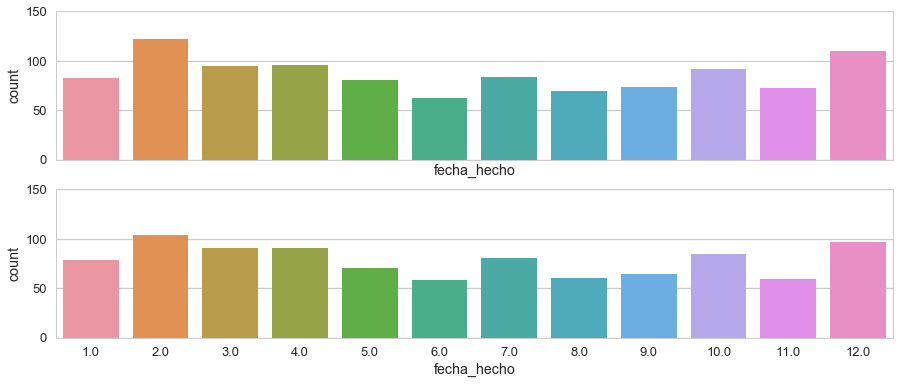

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,6), sharex=True)
sns.countplot(fecha_mes, ax=ax1)
sns.countplot(fecha_mes_principal, ax=ax2)
ax1.set_ylim(0, 150)
ax2.set_ylim(0, 150)

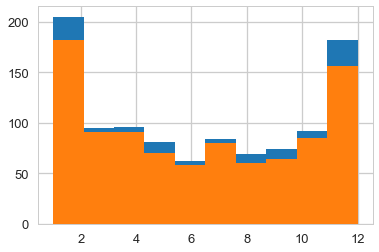

In [18]:
fecha_mes.hist()
fecha_mes_principal.hist()

Exploro sobre los tipos de homicidio

In [19]:
# para sacar los 'Sin datos' uso
dataset['modalidad_comisiva'].value_counts().drop(['Sin datos'])

DISPARO DE BALA -                                236
ACUCHILLAMIENTO -                                192
GOLPES -                                         118
ESTRANGULAMIENTO -                                52
QUEMADURAS -                                      50
APUÑALAMIENTO -                                   49
ASFIXIA -                                         26
DEGOLLAMIENTO -                                   22
OTROS -                                           18
GOLPES - ACUCHILLAMIENTO -                        18
AHORCAMIENTO -                                    18
OTROS - GOLPES -                                  12
ESTRANGULAMIENTO - GOLPES -                       10
OTROS - ESTRANGULAMIENTO -                         8
DESCUARTIZAMIENTO -                                7
ESTRANGULAMIENTO - ASFIXIA -                       7
ABUSO SEXUAL -                                     5
DISPARO DE BALA - DISPARO DE BALA -                5
OTROS - ACUCHILLAMIENTO -                     

In [165]:
# tengo que identificar la comisidad omisiva considerando cada caso por separado
# primero saco los que no tienen datos
mod_comisiva = dataset.where(dataset['modalidad_comisiva'] != 'Sin datos')
mod_comisiva = mod_comisiva.modalidad_comisiva.dropna()

index_comisiva = []

for i in range(len(dataset)):
    try:
        index_comisiva.append(mod_comisiva[i].split('-'))
    except:
        continue

for i in range(len(dataset)):
    try:
        index_comisiva[i].remove('')
    except:
        continue

formas_matar = []
for i in range(len(dataset)):
    try:
        formas_matar.append(str(index_comisiva[i]).replace(' ', ''))
    except:
        continue

index_comisiva[0][0]

'QUEMADURAS '

In [145]:

def contar_modalidad(mod,mod_serie):
    count = 0
    for mod_s in mod_serie:
        if mod in mod_s:
            count = count + 1
    return count
contar_modalidad('ASFIXIA - GOLPES',comisidad_omisiva)

7

In [152]:
dataset['comisidad_omisiva']

KeyError: 'comisidad_omisiva'